# Práctica 12: Estrategias para la construcción de algoritmos (II)     EDA 1

<img src="img/logo.png" height="400" width="200">

### Elaborado por:

* Granados Villeda Johan Raciel


## Objetivo:

>El objetivo de esta guía es aplicar dos enfoques de diseño de algoritmos y analizar las implicaciones de cada uno de ellos. Al final de esta guía sabrás:

>>1. Implementar Insertion sort y Quick sort, Graficar funciones usando la librería Matplotlib
>>2. Generar listas de números aleatorios
>>3. Utilizar en la notebook funciones guardadas en archivos
>>4. Medir tiempos de ejecución

## Problema:

>1.Incluir los algoritmos de ordenamiento de Bubble sort y Merge Sort , para ser comparados con Insert Sort y Quick Sort, se debe generar una gráfica con el tiempo de ordenamiento para cada lista de números enteros con 100, 200, 300, …, 3000 números usando una dispersión en los datos entre 0 y 10000000 similar a la práctica. 

In [1]:
#Importando bibliotecas
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cargando módulos
import random
from time import time

#Cargando las funciones guardadas en los archivo
from insertionSort import insertionSort_time
#Sólo se necesita llamar a la función principal
from quickSort import quicksort_time
from burbuja import bubbleSort
from mergeSort import mergeSort

In [3]:
#Tamaños de la lista de números aleatorios a generar
datos = [ii*150 for ii in range(1,21)] 

tiempo_is = []  #Lista para guardar el tiempo de ejecución de insert sort
tiempo_qs = []  #Lista para guardar el tiempo de ejecución de quick sort
tiempo_bs = []
tiempo_ms = []

for ii in datos:
    lista_is = random.sample(range(0, 10000000), ii)
    #Se hace una copia de la lista para que se ejecute el algoritmo con los mismo números
    lista_qs = lista_is.copy() 
    lista_bs = lista_is.copy()
    lista_ms = lista_is.copy()
    
    t0 = time()  #Se guarda el tiempo inicial
    insertionSort_time(lista_is)
    tiempo_is.append(round(time()-t0, 6))   #Se le resta al tiempo actual, el tiempo inicial
    
    t0 = time()    
    quicksort_time(lista_qs)
    tiempo_qs.append(round(time()-t0, 6))
    
    t0 = time()    
    bubbleSort(lista_qs)
    tiempo_bs.append(round(time()-t0, 6))
    
    t0 = time()    
    mergeSort(lista_ms,0,len(lista_ms)-1)
    tiempo_ms.append(round(time()-t0, 6))
    

In [4]:
#Imprimiendo tiempos parciales de ejecución
print("Tiempos parciales de ejecución en INSERT SORT {} [s] \n".format(tiempo_is))
print("Tiempos parciales de ejecución en QUICK SORT {} [s]".format(tiempo_qs))
print("Tiempos parciales de ejecución en BUBBLE SORT {} [s]".format(tiempo_bs))
print("Tiempos parciales de ejecución en MERGE SORT {} [s]".format(tiempo_ms))

Tiempos parciales de ejecución en INSERT SORT [0.003098, 0.005597, 0.0149, 0.027247, 0.040774, 0.058578, 0.077101, 0.107943, 0.126072, 0.174445, 0.192223, 0.229864, 0.281299, 0.300249, 0.359249, 0.406501, 0.447029, 0.49721, 0.563065, 0.624079] [s] 

Tiempos parciales de ejecución en QUICK SORT [0.001306, 0.000908, 0.00139, 0.001914, 0.00275, 0.003148, 0.003801, 0.004199, 0.004849, 0.005386, 0.006253, 0.006954, 0.00769, 0.007936, 0.00831, 0.009731, 0.009312, 0.010618, 0.010536, 0.01103] [s]
Tiempos parciales de ejecución en BUBBLE SORT [0.002019, 0.005721, 0.013196, 0.02355, 0.039086, 0.05733, 0.080159, 0.104186, 0.130208, 0.165053, 0.194168, 0.230493, 0.275675, 0.313002, 0.356188, 0.407589, 0.468489, 0.492311, 0.595049, 0.640447] [s]
Tiempos parciales de ejecución en MERGE SORT [0.000888, 0.001967, 0.003195, 0.00433, 0.005717, 0.006911, 0.008539, 0.009804, 0.011001, 0.014212, 0.013625, 0.016245, 0.016703, 0.017798, 0.020176, 0.021013, 0.021758, 0.023535, 0.025516, 0.027334] [s]


In [5]:
#Imprimiendo tiempos totales de ejecución
#Para calcular el tiempo total se aplica la función sum() a las listas de tiempo
print("Tiempo total de ejecución en insert sort {} [s]".format(sum(tiempo_is)))
print("Tiempo total de ejecución en quick sort {} [s]".format(sum(tiempo_qs)))
print("Tiempo total de ejecución en bubble sort {} [s]".format(sum(tiempo_bs)))
print("Tiempo total de ejecución en merge sort {} [s]".format(sum(tiempo_ms)))

Tiempo total de ejecución en insert sort 4.536523 [s]
Tiempo total de ejecución en quick sort 0.11802100000000001 [s]
Tiempo total de ejecución en bubble sort 4.593919 [s]
Tiempo total de ejecución en merge sort 0.27026700000000003 [s]


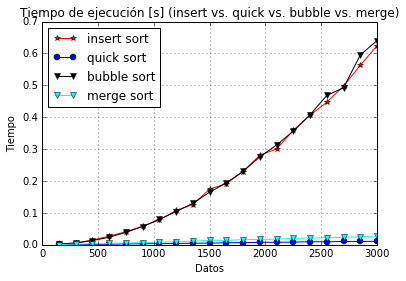

In [6]:
#Generando la gráfica
fig, ax = subplots()
ax.plot(datos, tiempo_is, label="insert sort", marker="*",color="r")
ax.plot(datos, tiempo_qs, label="quick sort", marker="o",color="b")
ax.plot(datos, tiempo_bs, label="bubble sort", marker="v",color="black")
ax.plot(datos, tiempo_ms, label="merge sort", marker="v",color="cyan")
ax.set_xlabel('Datos') 
ax.set_ylabel('Tiempo') 
ax.grid(True)
ax.legend(loc=2); 

plt.title('Tiempo de ejecución [s] (insert vs. quick vs. bubble vs. merge)')
plt.show()